📋 PROBLEM STATEMENT
Business Context:
Sebuah bank mengalami customer churn (pelanggan yang meninggalkan layanan). Biaya akuisisi customer baru 5-25x lebih mahal daripada mempertahankan customer existing. Bank ingin:

Memahami faktor-faktor yang menyebabkan churn
Memprediksi customer mana yang berisiko churn
Mengambil tindakan proaktif untuk retention

Your Goal:
Membangun sistem prediksi churn yang dapat membantu bank mengidentifikasi customer berisiko tinggi untuk program retention.

In [1]:
from google.colab import drive
%pip install ipython-sql sqlalchemy
%load_ext sql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.2 MB/s eta 0:00:0000:01


In [2]:
engine = create_engine('sqlite://')

id_url = '1gyXLUT9RO03npir5b_vgGXrGnAEplpui'
url_csv = f'https://drive.google.com/uc?export=download&id={id_url}'
df = pd.read_csv(url_csv)
df.to_sql('custchurn', con=engine, if_exists='replace', index=False)

%sql sqlite://

query_table = """ SELECT * 
FROM custchurn
LIMIT 5;
"""

result_table = pd.read_sql_query(query_table, engine)
print(result_table.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [3]:
df.shape
df.dtypes
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


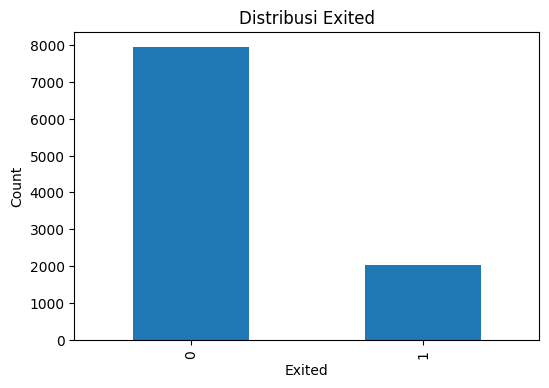

np.int64(0)

In [5]:
#distribusi kolom Exited

plt.figure(figsize=(6,4))
df['Exited'].value_counts().plot(kind='bar')
plt.title('Distribusi Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

df.duplicated().sum()

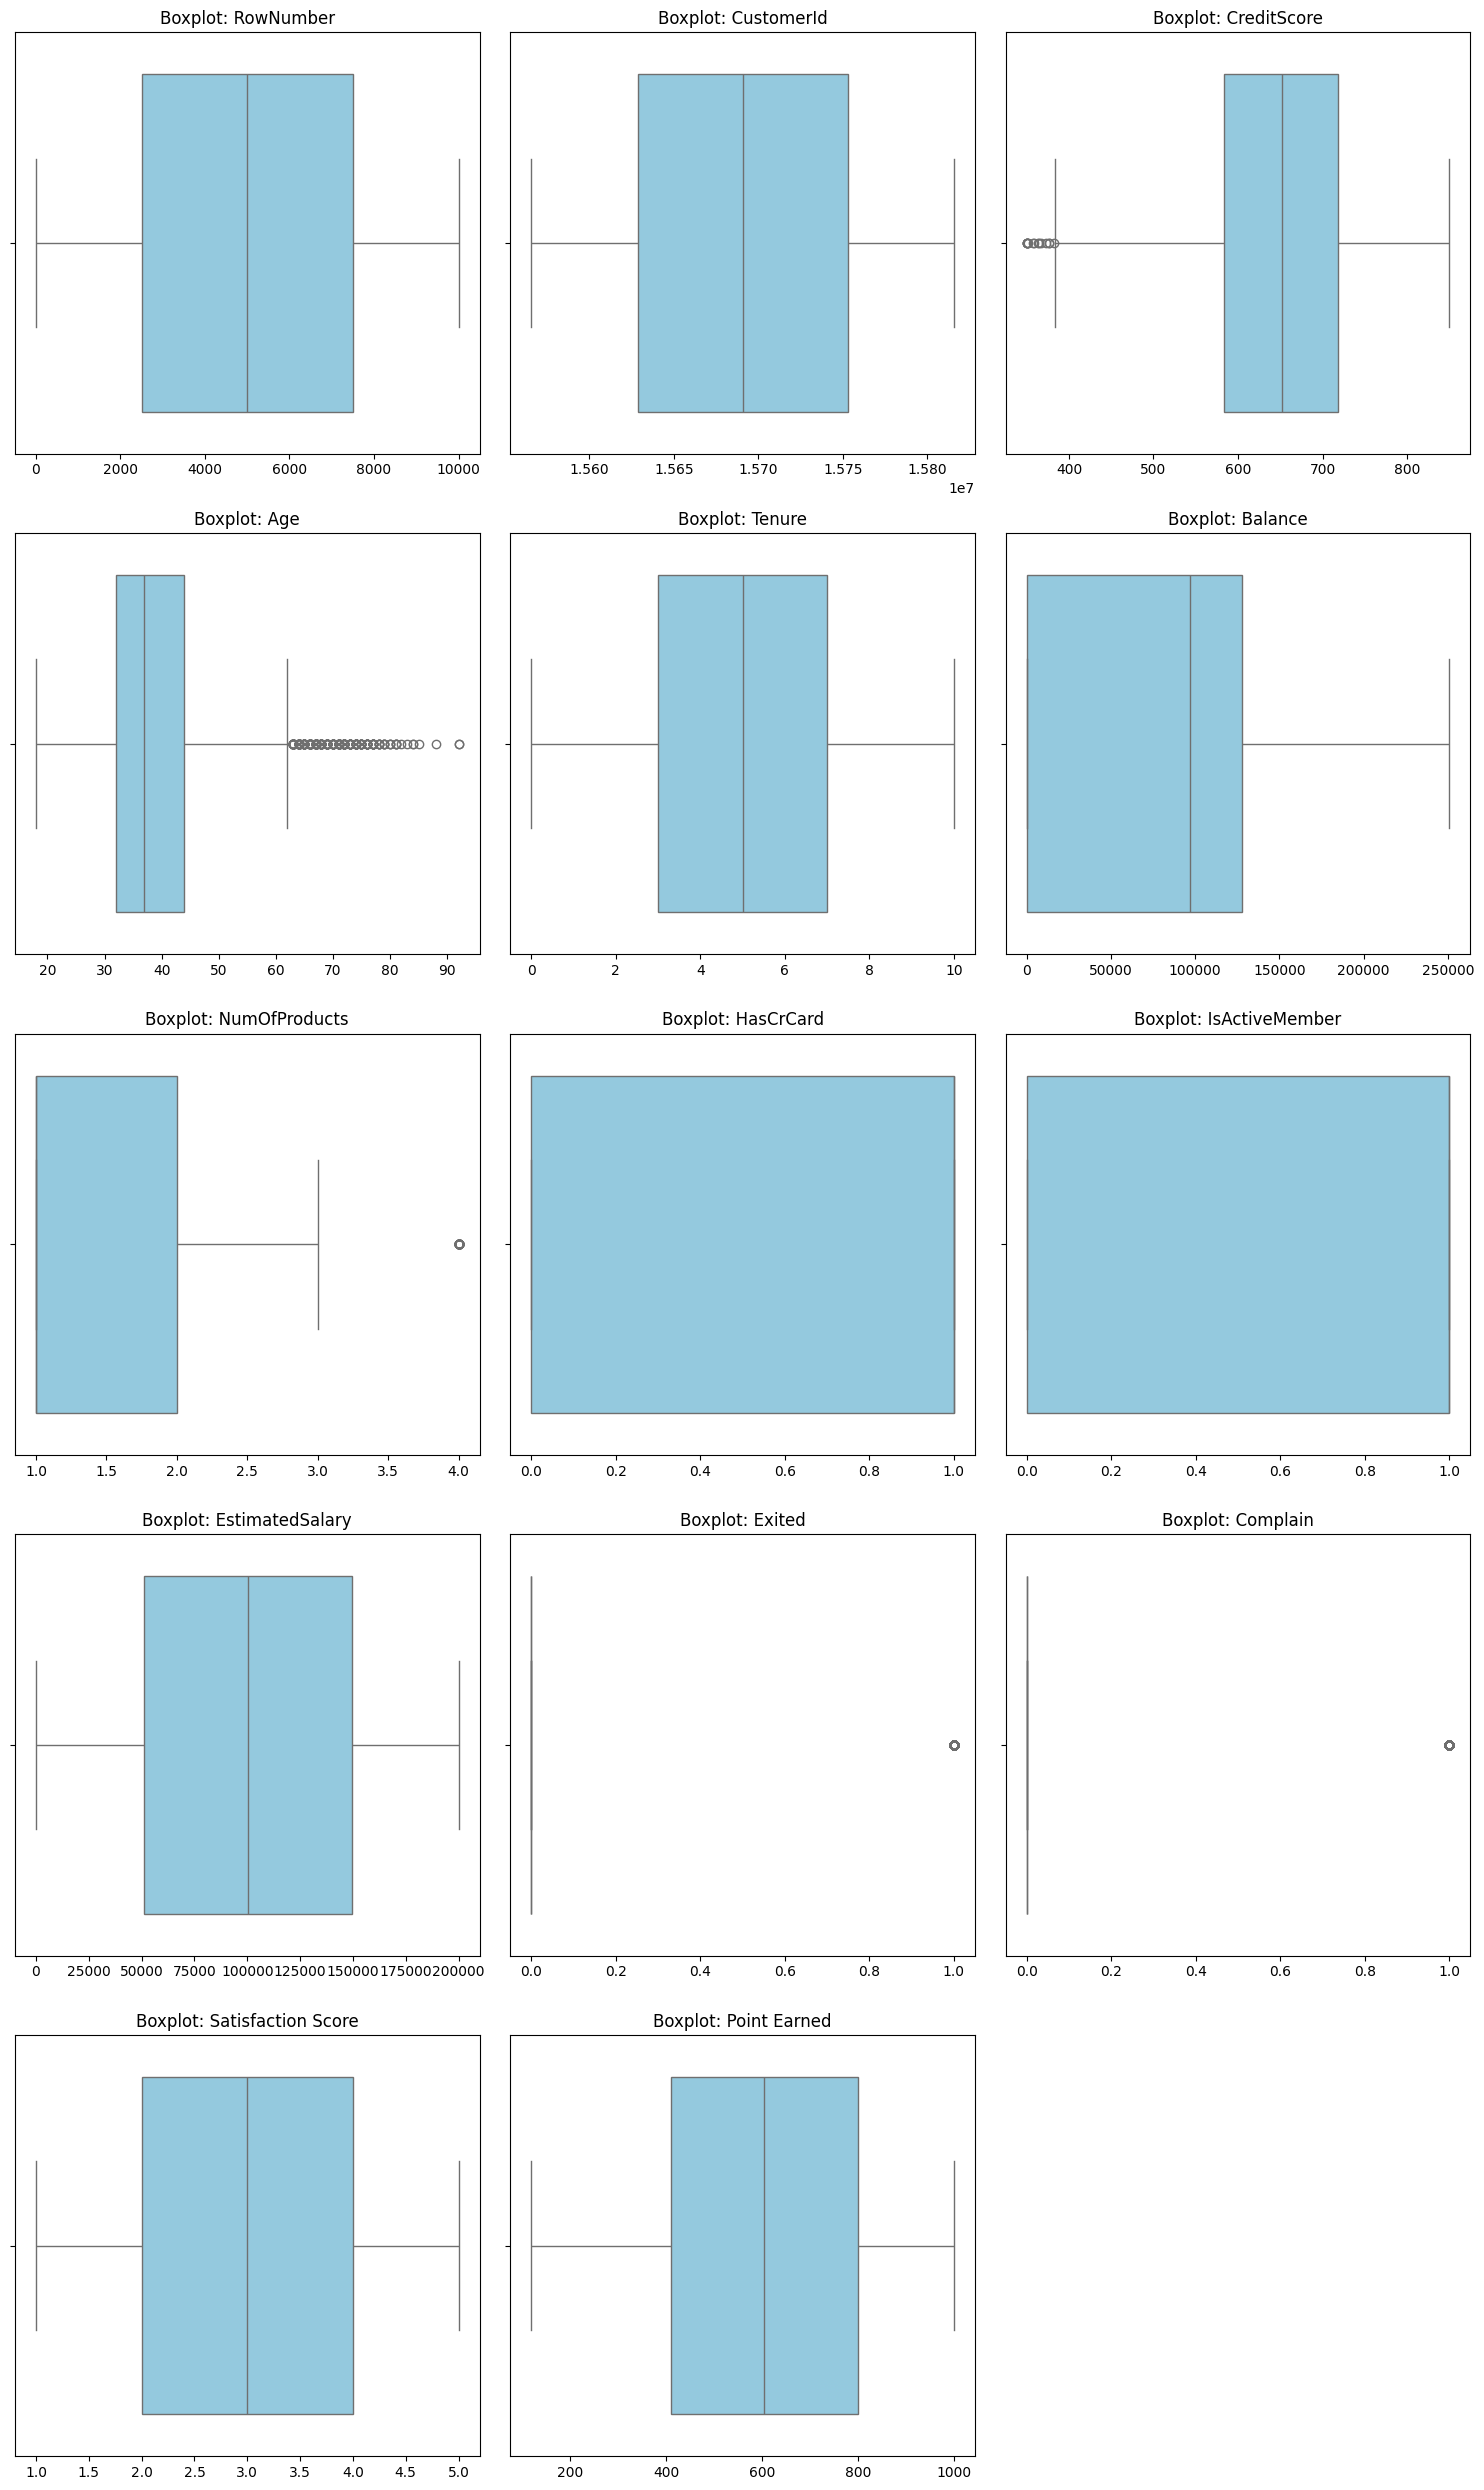

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = len(numerical_cols)
n_rows = math.ceil(n_cols / 3)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False)) 
    print("\n")

for col in categorical_cols:
    num_unique = df[col].nunique()
    print(f"{col}: {num_unique} unique values")


--- Surname ---
Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64


--- Geography ---
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


--- Gender ---
Gender
Male      5457
Female    4543
Name: count, dtype: int64


--- Card Type ---
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


Surname: 2932 unique values
Geography: 3 unique values
Gender: 2 unique values
Card Type: 4 unique values


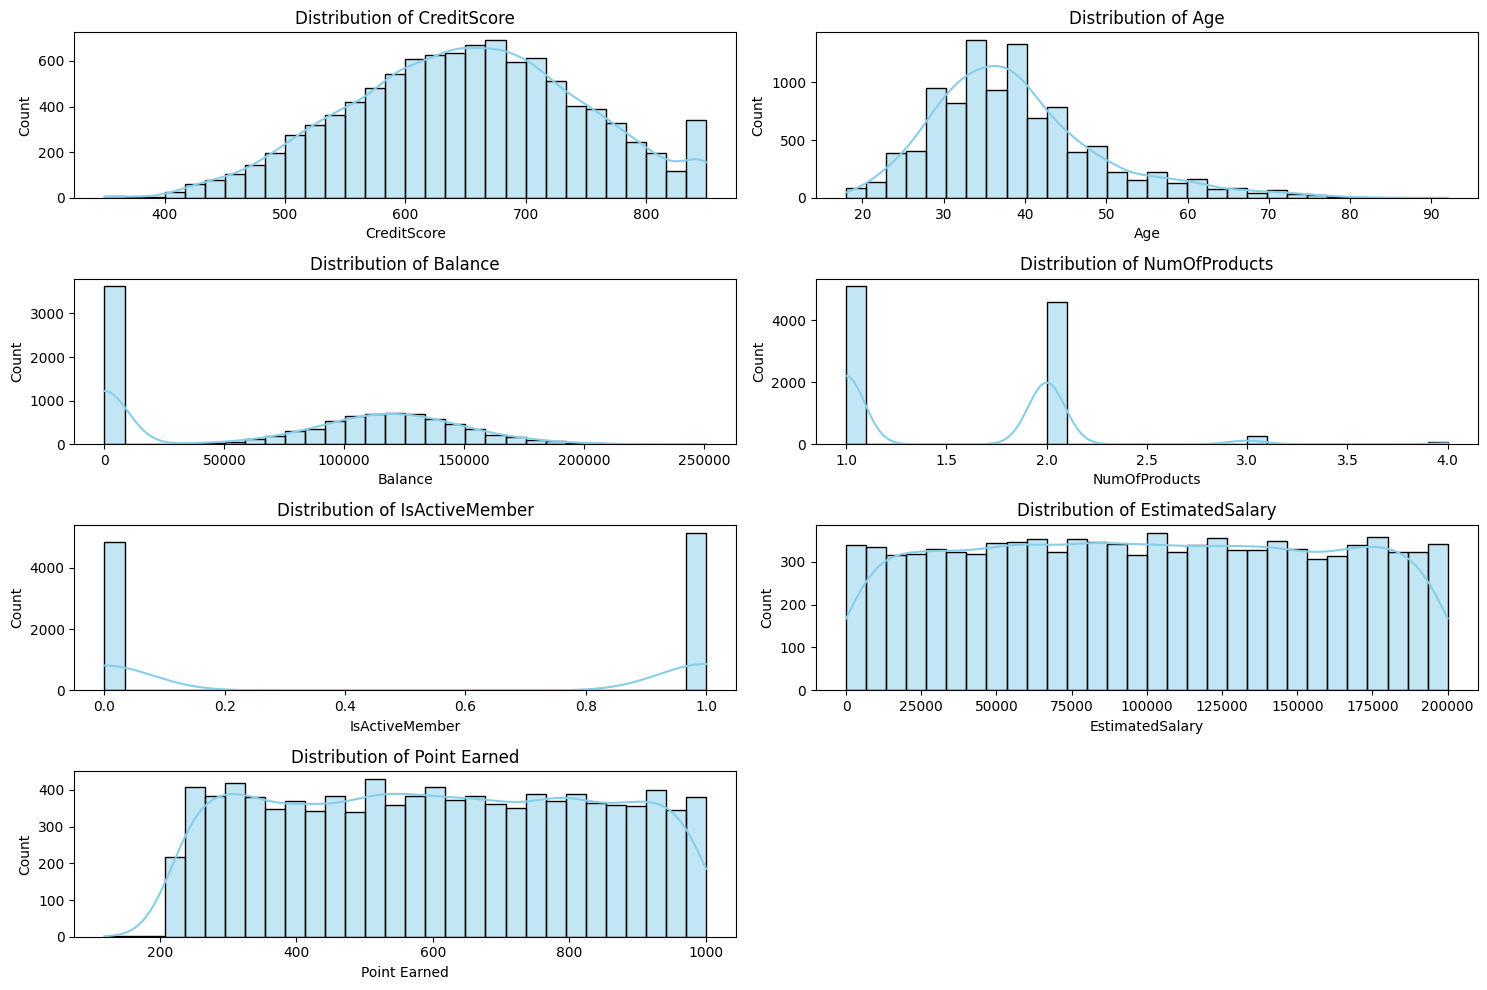

In [8]:
numeric_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Point Earned'] 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-539476483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')
/tmp/ipython-input-539476483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')
/tmp/ipython-input-539476483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


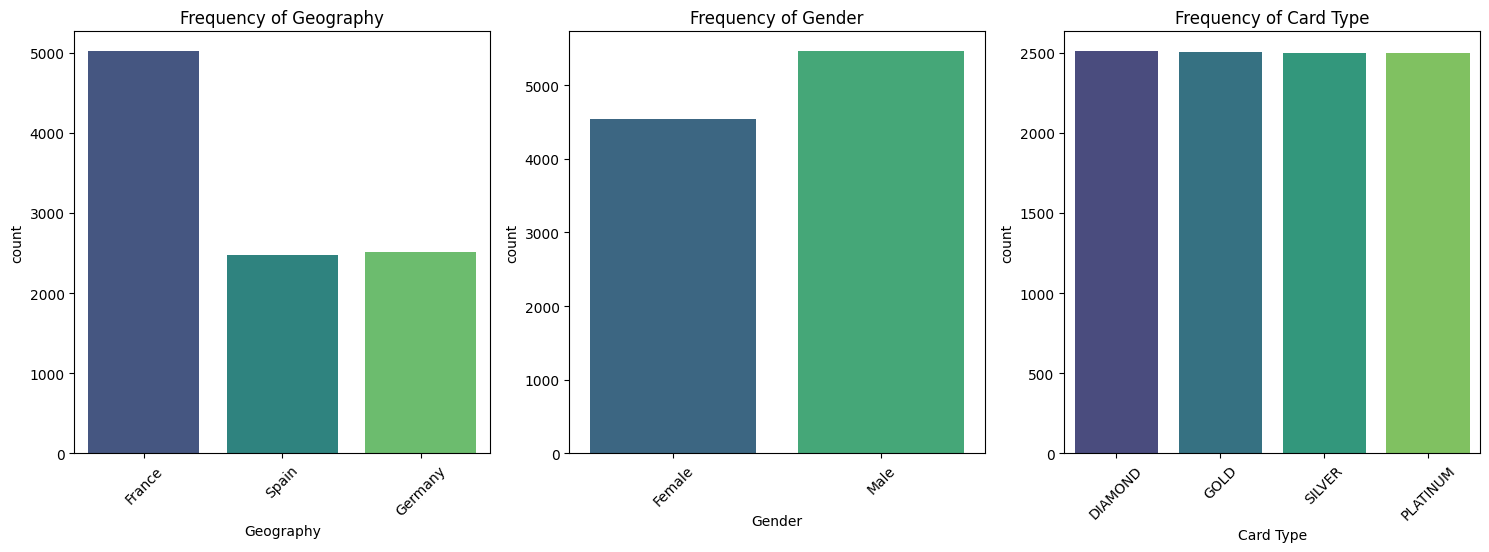

In [9]:
categorical_features = ['Geography', 'Gender', 'Card Type']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

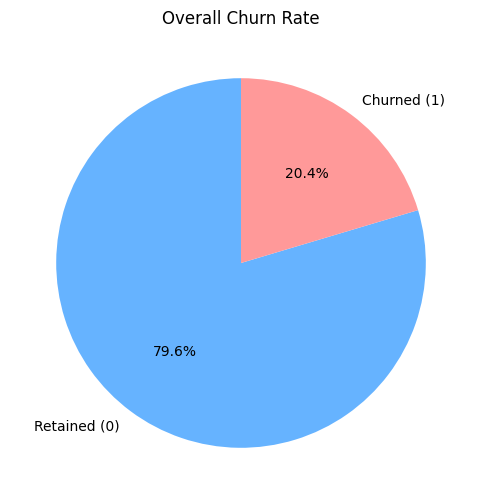

In [10]:
plt.figure(figsize=(6, 6))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained (0)', 'Churned (1)'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Overall Churn Rate')
plt.show()

/tmp/ipython-input-762493683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Exited', data=df, palette='Reds')


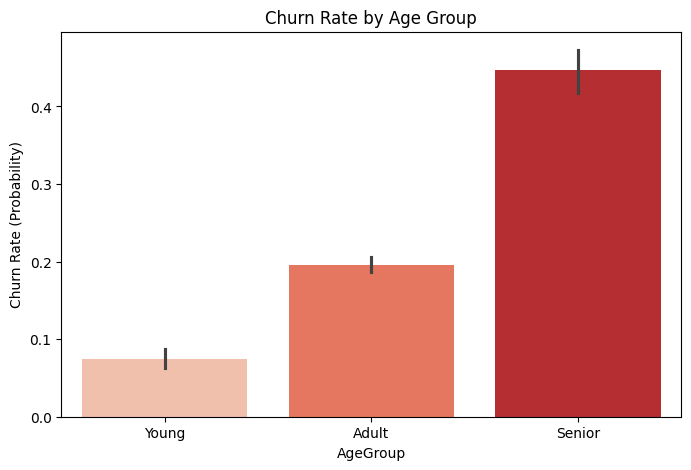

/tmp/ipython-input-762493683.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Exited', data=df, palette='muted', errorbar=None)
/tmp/ipython-input-762493683.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Exited', data=df, palette='muted', errorbar=None)
/tmp/ipython-input-762493683.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Exited', data=df, palette='muted', errorbar=None)
/tmp/ipython-input-762493683.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

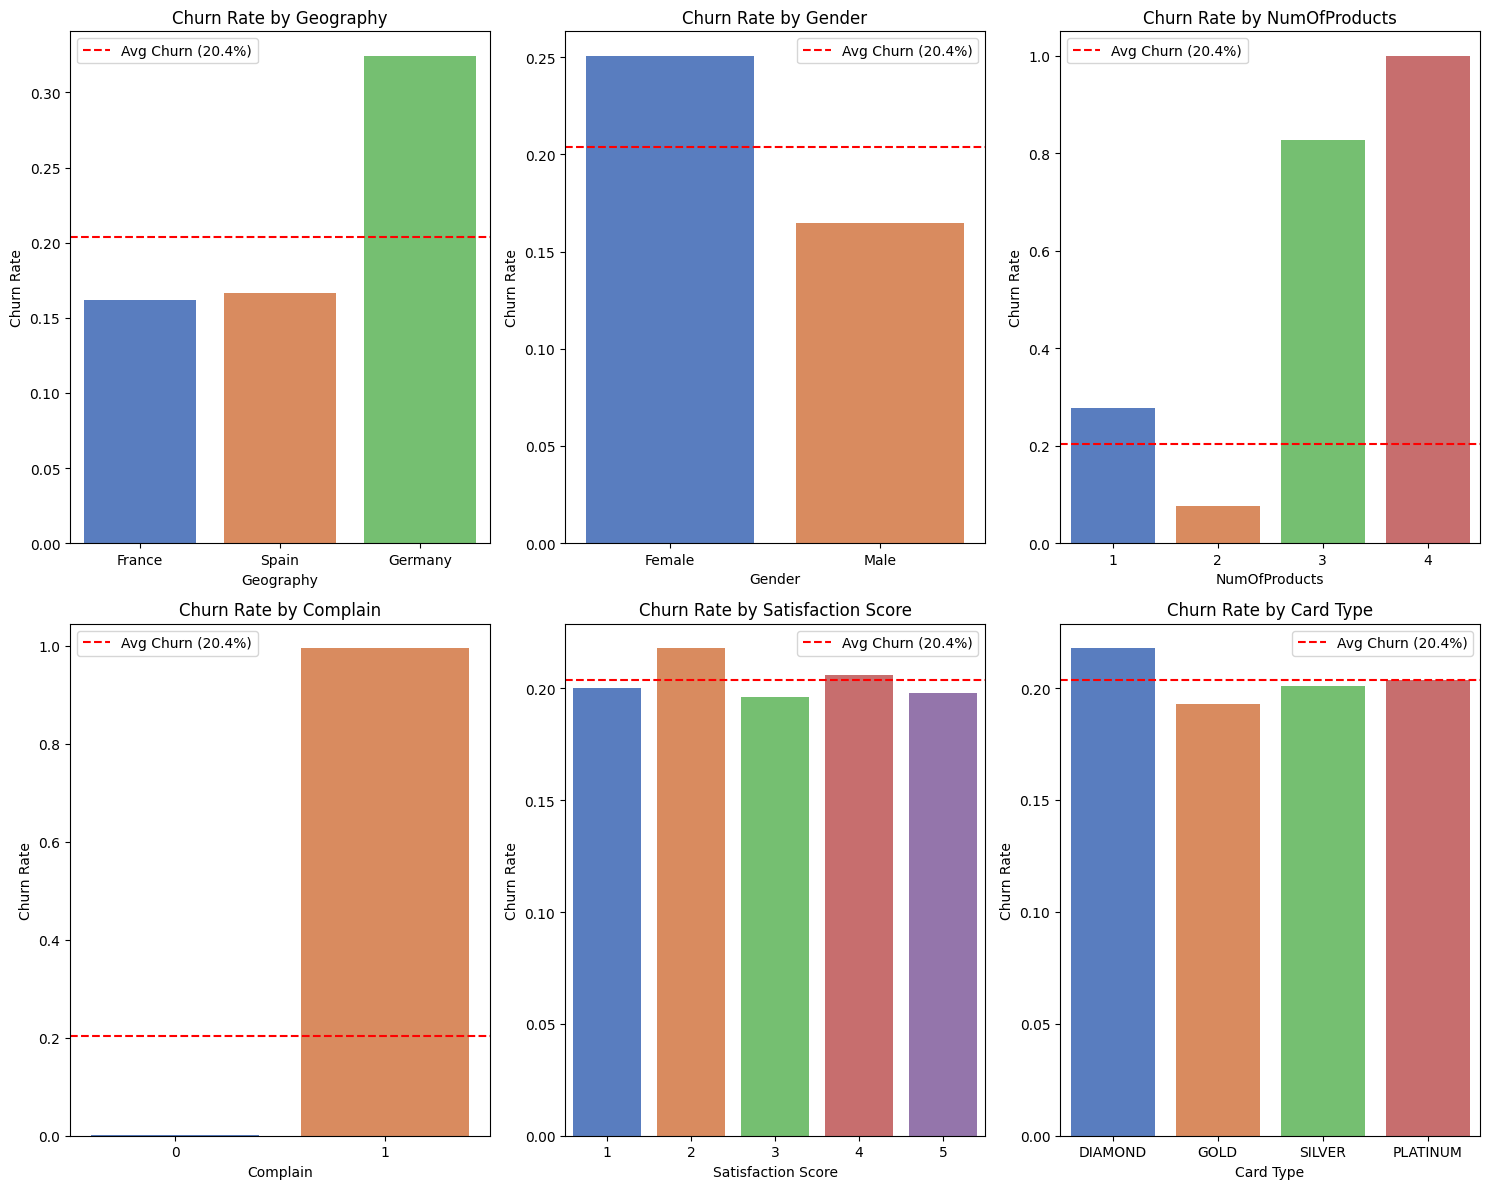

In [11]:
bins_age = [18, 30, 50, 92]
labels_age = ['Young', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Exited', data=df, palette='Reds')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate (Probability)')
plt.show()

features_to_analyze = [
    'Geography', 
    'Gender', 
    'NumOfProducts',    
    'Complain',         
    'Satisfaction Score', 
    'Card Type'
]

plt.figure(figsize=(15, 12))
for i, col in enumerate(features_to_analyze):
    plt.subplot(2, 3, i+1)
    
    sns.barplot(x=col, y='Exited', data=df, palette='muted', errorbar=None) 
    
    global_churn = df['Exited'].mean()
    plt.axhline(global_churn, color='red', linestyle='--', label=f'Avg Churn ({global_churn:.1%})')
    
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.legend()

plt.tight_layout()
plt.show()

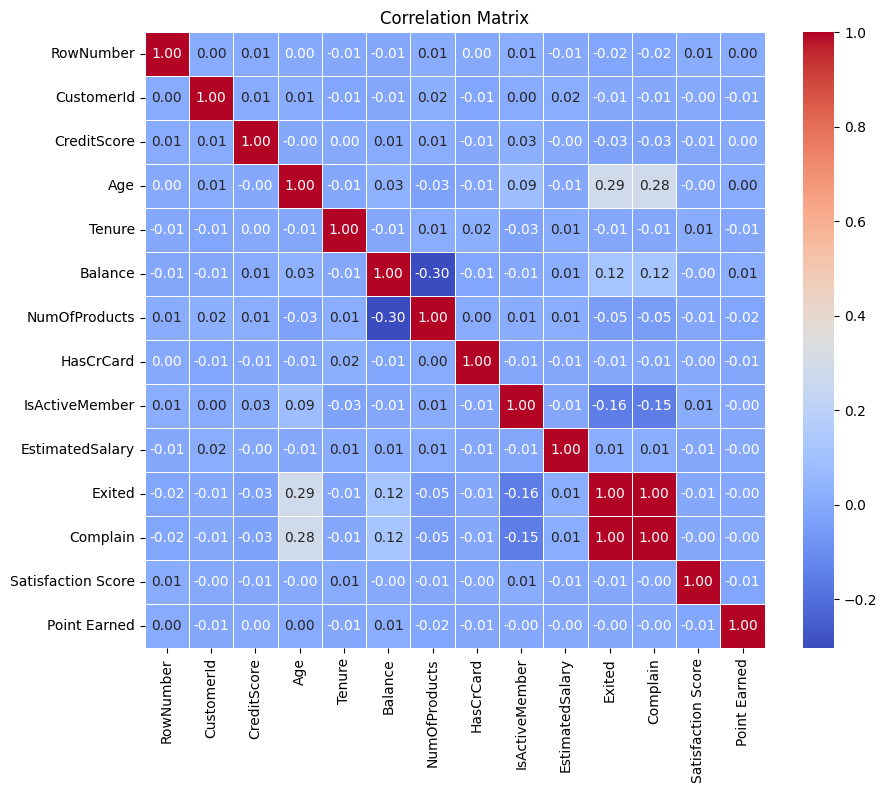

In [12]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
df['Tenure_Category'] = pd.cut(df['Tenure'], bins = [-1, 2, 7, 11], labels=['New', 'Established', 'Loyal'])

def categorize_balance(x):
    if x == 0:
        return 'Zero Balance'
    elif x <= 100000:
        return 'Low Balance'
    else:
        return 'High Balance'

df['Balance_Category'] = df['Balance'].apply(categorize_balance)

df['CreditScore_Category'] = pd.qcut(df['CreditScore'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

_, bins = pd.qcut(df['CreditScore'], q=4, labels=['Low', 'Medium', 'High', 'Very High'], retbins=True)
print("Credit Score Bins:", bins)

cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

df.head()

Credit Score Bins: [350. 584. 652. 718. 850.]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,Tenure_Category,Balance_Category,CreditScore_Category
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Adult,New,Zero Balance,Medium
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Adult,New,Low Balance,Medium
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Adult,Loyal,High Balance,Low
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Adult,New,Zero Balance,High
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Adult,New,High Balance,Very High


# 📊 Customer Churn Analysis Insights

## 1. Overview & Key Metrics
Secara keseluruhan, dataset menunjukkan adanya masalah retensi pelanggan yang cukup signifikan.
- **Total Churn:** Sebanyak kurang lebih **2.000 nasabah** (dari total 10.000) telah berhenti berlangganan.
- **Churn Rate:** Tingkat churn berada di angka **20.4%**. Angka ini tergolong tinggi untuk industri perbankan dan mengindikasikan 1 dari 5 nasabah memilih untuk meninggalkan bank.

## 2. Customer Profile at Risk (Siapa yang Churn?)
### a. Faktor Demografi & Geografi
* **Age Group (Senior):** Terdapat tren kenaikan probabilitas churn seiring bertambahnya usia. Nasabah kategori **Senior (>50 tahun)** jauh lebih rentan meninggalkan bank dibandingkan nasabah muda atau dewasa.
* **Geography (Germany):** Nasabah yang berdomisili di **Jerman** memiliki tingkat churn rate paling tinggi dibandingkan Prancis dan Spanyol. Hal ini mengindikasikan adanya masalah lokal di wilayah tersebut (bisa berupa kompetitor kuat atau layanan cabang yang kurang optimal).
* **Gender (Female):** Secara proporsi, nasabah **Perempuan** memiliki kecenderungan churn yang sedikit lebih tinggi dibandingkan laki-laki.

### b. Faktor Perilaku & Produk (Behavioral)
* **Product Holdings (3-4 Produk):** Terjadi anomali di mana nasabah yang memiliki **3 hingga 4 produk** justru memiliki tingkat churn yang sangat tinggi (hampir 100% pada 4 produk). Ini kontradiktif dengan asumsi umum bahwa "semakin banyak produk semakin setia". Kemungkinan terjadi *over-selling* atau nasabah merasa terbebani dengan kompleksitas produk.
* **Complain Status (Critical Factor):** Ini adalah indikator terkuat. Hampir **100% nasabah yang pernah mengajukan komplain (Complain = 1)** berakhir dengan status Churn.

## 3. Business Recommendations
Berdasarkan insight di atas, rekomendasi tindakan strategis adalah:
1.  **Immediate Complaint Handling:** Membangun sistem *priority response* untuk setiap komplain yang masuk, karena komplain adalah sinyal pasti nasabah akan pergi.
2.  **Germany Market Investigation:** Melakukan audit khusus terhadap layanan atau kompetitor di Jerman untuk memahami mengapa churn rate di sana sangat tinggi.
3.  **Review Product Bundling:** Mengevaluasi kembali strategi *bundling* produk. Jangan memaksa nasabah mengambil 3-4 produk jika itu justru membebani dan membuat mereka tidak nyaman.
4.  **Senior Citizen Program:** Merancang antarmuka aplikasi atau layanan yang lebih ramah bagi lansia (Senior Friendly) untuk menekan angka churn di demografi usia lanjut.